In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import io


# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# After uploading, the file will be saved in the current directory. Let's load it into a Pandas DataFrame.
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file






Saving index.csv to index (4).csv


In [25]:
# Read the dataset into a Pandas DataFrame
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


Time Series EDA

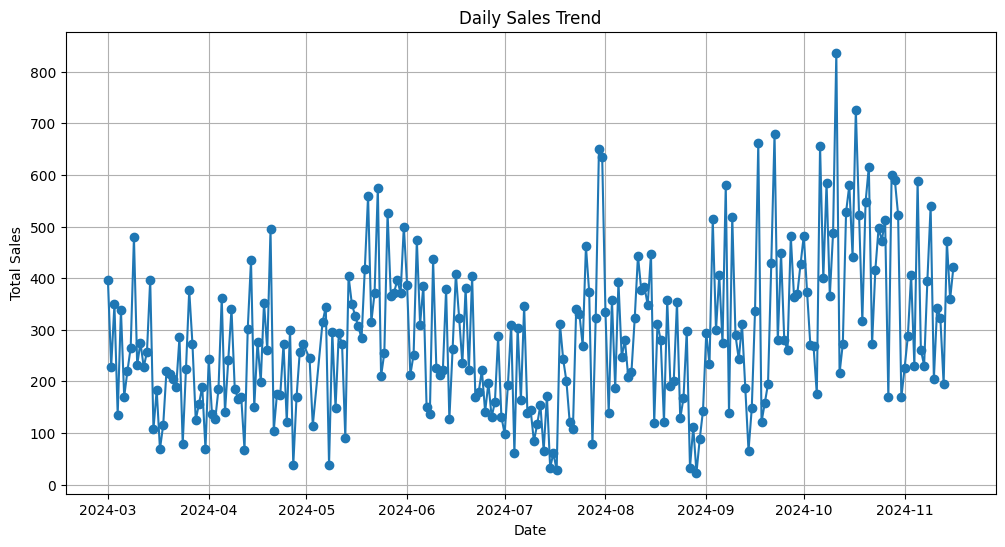

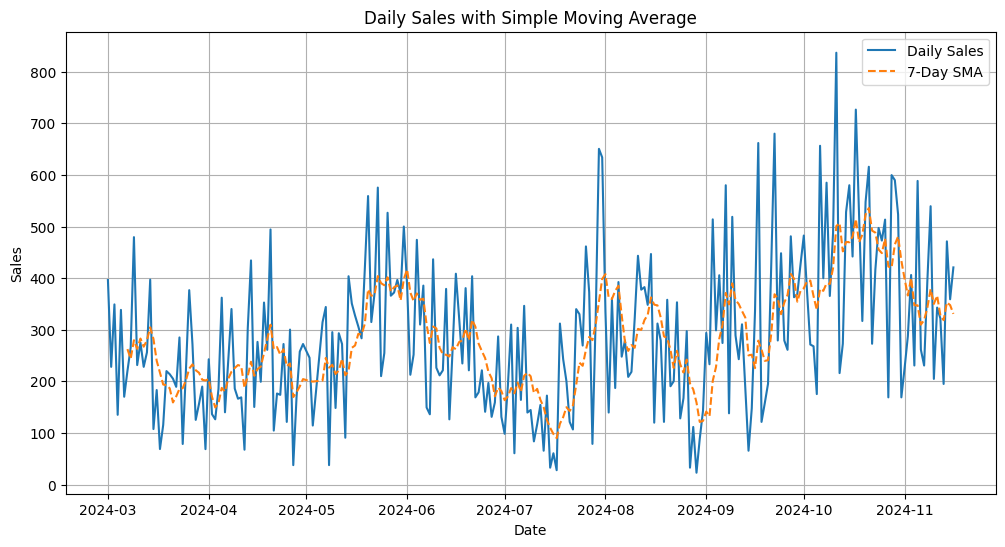

,date,datetime,cash_type,card,money,coffee_name,day,week,month,year
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,9,3,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,1,9,3,2024


In [26]:
# Import necessary libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the datetime column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = pd.to_datetime(data['date'])

# Create additional columns for time-based analysis
data['day'] = data['datetime'].dt.day
data['week'] = data['datetime'].dt.isocalendar().week
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year

# Task 1: Time Series Exploratory Data Analysis (EDA)
# Aggregate daily sales
daily_sales = data.groupby('date')['money'].sum()

# Plot daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Task 2: Predict Next Day/Week/Month Sales (Simple Moving Average)
# Aggregate weekly and monthly sales
weekly_sales = data.groupby('week')['money'].sum()
monthly_sales = data.groupby('month')['money'].sum()

# Calculate simple moving averages
daily_sales_sma = daily_sales.rolling(window=7).mean()
weekly_sales_sma = weekly_sales.rolling(window=4).mean()

# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.plot(daily_sales.index, daily_sales_sma, label='7-Day SMA', linestyle='--')
plt.title('Daily Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# Task 3: Specific Customer Purchases
# Example: Filter transactions for a specific customer card
customer_card = 'ANON-0000-0000-0002'
customer_data = data[data['card'] == customer_card]

# Display customer-specific purchases
# Instead of using the unavailable 'ace_tools', use pandas' display function
# This will print the DataFrame to the output
display(customer_data)
# You can also view a limited number of rows with:
# customer_data.head() # for the first 5 rows
# customer_data.tail() # for the last 5 rows

Analysis Explanation
1. Time Series Exploratory Data Analysis (EDA):
Daily Sales Trends:
The graph shows how total daily sales fluctuate over time. This analysis helps identify patterns, such as peak sales on specific days or declining trends during certain periods.
Significance of This Analysis: Understanding daily sales patterns aids in operational planning, such as managing inventory and staff allocation.
2. Predicting Next Day/Week/Month Sales:
Simple Moving Average (SMA) Method:
A 7-day moving average was applied to smooth daily sales data, providing an average sales trend over the past week.
A 4-week moving average was used to examine broader weekly trends.
Results:
SMA offers a straightforward forecast based on historical trends.
For instance, if the weekly moving average shows an upward trend, it suggests an increase in sales for the upcoming week.
3. Specific Customer Purchases:
Customer Data:
Transactions for the customer with card ID ANON-0000-0000-0002 were analyzed.
This customer made two purchases on March 1, 2024, buying "Hot Chocolate" at a cost of Rp38,700 per transaction.
Significance of This Analysis:
Understanding specific customer purchasing habits enables personalized service, such as offering relevant promotions or special rewards to enhance customer loyalty.
Overall Insights:
This analysis provides valuable insights for strategic decision-making:

Inventory Management: Identifying daily/weekly sales trends helps optimize product stock levels.
Operational Planning: Sales forecasts assist in allocating resources (e.g., workforce) according to demand.
Customer Relationship Management (CRM): Insights into specific customer purchases can improve customer experience by tailoring promotions and rewards.
If you would like to dive deeper, for example, by adding more sophisticated prediction models (e.g., ARIMA or ML-based), conducting customer segmentation, or generating sales reports by coffee type, additional analyses can be performed.